# Notebook to execute MCFOST and examine its outputs

In [1]:
import glob, getpass, sys, os
sys.path.append('../library/')

import numpy as np
import matplotlib.pyplot as plt
from mcfost_dust   import Dust   as McDust
from mcfost_polimg import ImgPol as McImg

In [2]:
wave   = 0.5 # default, this valus is overwritten if MCFOST is executet
RUN_MC = False

## Execute MCFOST

In [3]:
# MCFOTS terminal messages are print in the terminal where this Notebook is executed
if RUN_MC:
    para = '../para_files/test_21_10_2019.para'
    wave = np.float(input('Introduce wavelength [microms]: '))
    text = f'Executing MCFOST for wavelength {wave} [microns]'
    print('=' * len(text))
    print(text)
    print('=' * len(text))
    os.system(f'sh doit.sh {para} {wave}')

In [4]:
# By default the code examine the latest directory
mcdirs = glob.glob('mcfostout_*')
mcdirs.sort()
newest_run = mcdirs[-1] + '/'

## Examine DUST Phase Function & Polarisation properties 

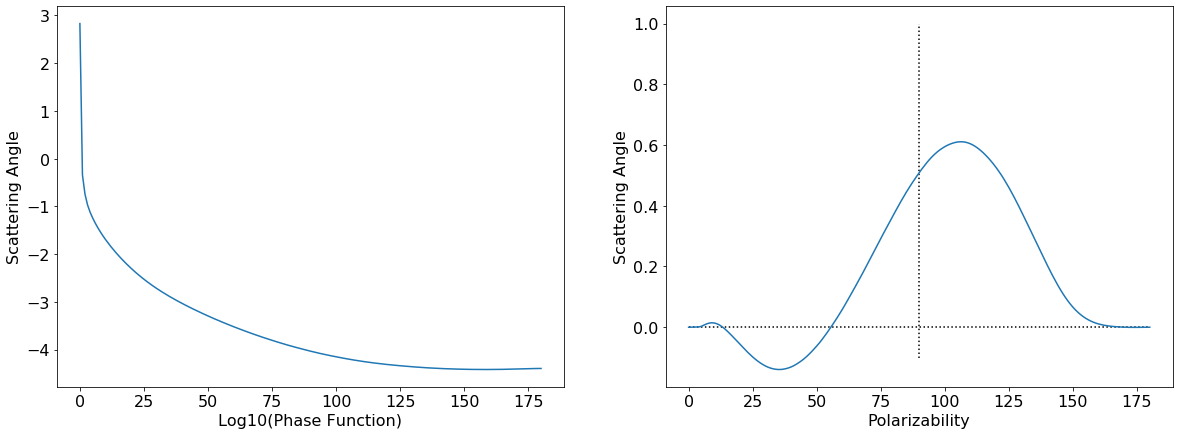

In [5]:
# Read MCFOST OUTPUT: DUST PROPERTIES ===================
mcfost_out = McDust(newest_run)
mcfost_out.read_lambda()
mcfost_out.read_pol()
mcfost_out.read_phase_f()
mcfost_out.plot_scat()

## Examine Polarised Images

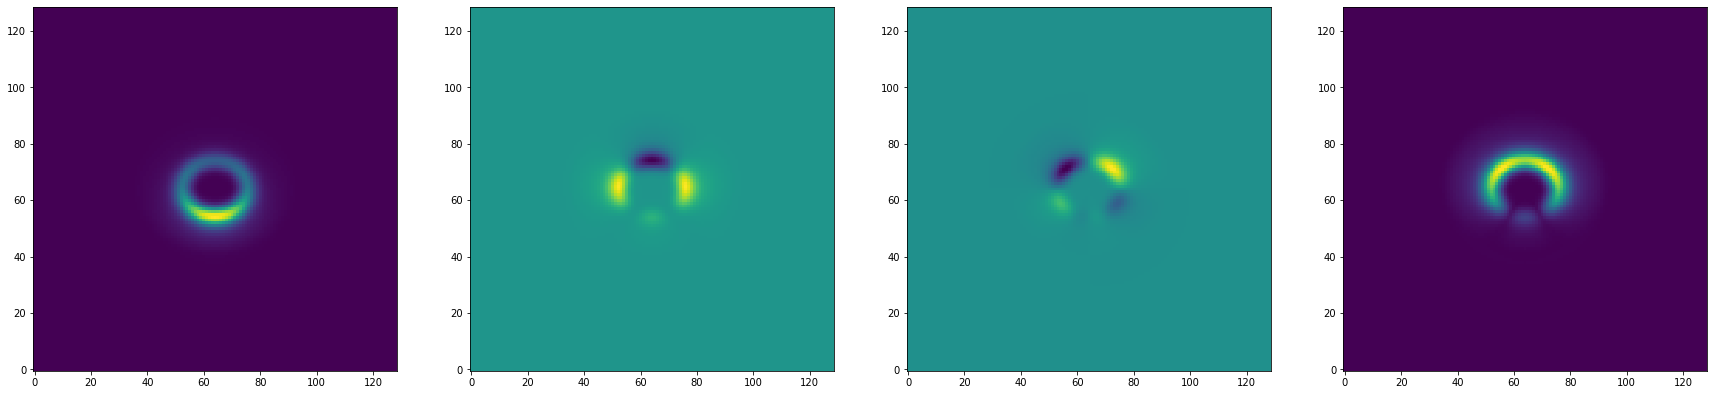

In [14]:
imgs = McImg(newest_run, wave)
imgs.read_fitscube()
imgs.get_dims()
imgs.get_imgs()
imgs.define_PSF(kernel = 2)
imgs.convolve()
imgs.make_pol()
imgs.plot_pol_imgs() # From Left to right: Disc in Intensity (total scattered light), Stokes Q, Stokes U, P_I = sqrt(Q*Q + U*U)

In [8]:
# TO DO (after Francois explains me/us how to load the experimental matrices to MCFOST):
# 1) Add labels to shown images, create option to save images in pdf, remove/change axes, etc etc
# 2) Convolve with Gaussian to emulate real observations                                                              >>>>> DONE
# 3) Add photon/gaussian noise to emulate real observations
# 4) Zoom-in images (I think better zooom in afterwards to not lose spatial resolution when MCFOST computes the grid)